# Cross validation

台新分析開發環境案客戶資料
https://drive.google.com/drive/u/2/folders/1AAXWPcB9xiDe_qX87ce5XL-utkASWxRe

請先連到這個分享資料夾，並且按下右鍵，加入你的 Google 雲端硬碟


In [0]:
# 這個是授權存取你的 Google 雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# 確認真的連上了資料
!ls drive/My\ Drive/台新分析開發環境案客戶資料

'Copy of 0606_口述台新資料欄位.m4a'
'Copy of 0610_嘉駿寄來的欄位內容.png'
'Copy of 0621_data_original.zip'
'Copy of profile.csv'
'Copy of profile.gsheet'
'Copy of result_y1.csv'
'Copy of result_y1.gsheet'
'Copy of result_y2.csv'
'Copy of sr_1.csv'
'Copy of sr_2.csv'
'Copy of sr_3.csv'
'Copy of sr_4.csv'
'Copy of status.csv'
'Copy of visa-merchant-data-standards-manual_用來對照sr_1.csv中的mcc欄位.pdf'
'Copy of zip 對照表.xlsx'
'Copy of 檔案欄位說明_MOOCS.XLSX'


In [0]:
# 正式開始
import pandas as pd
import os.path
import numpy as np

In [0]:
DATA_DIR='drive/My Drive/台新分析開發環境案客戶資料'
sr1_fn = os.path.join(DATA_DIR, 'Copy of sr_1.csv')
with open(sr1_fn, encoding='cp950', errors='replace') as sr1_f:
  sr1_df = pd.read_csv(sr1_f)
profile_fn = os.path.join(DATA_DIR, 'Copy of profile.csv')
profile_df = pd.read_csv(profile_fn)
profile_df.set_index('CUST_NO', inplace=True)

In [0]:
sr1_df.head()

,CUST_NO,EFF_DT,STMT_DT,amt,TXN_DESC,mcc
0,564755,20180615,20180702,174,全聯台中四平分公司 TAICHU/TW,5411
1,564755,20180624,20180702,484,全聯台中四平分公司 TAICHU/TW,5411
2,6185152,20180620,20180702,1035,健身工廠九如廠 Kaohsi/TW,7997
3,6185152,20180623,20180702,1304,富邦ｍｏｍｏ－ＥＣ TAIPEI/TW,5311
4,5318034,20170629,20180702,5899,國泰人壽保費部 第 12/12 期 /TW,6300


In [0]:
df = sr1_df[['CUST_NO', 'mcc', 'amt']].groupby(['CUST_NO', 'mcc']).sum().unstack().fillna(0)
df.head()

amt                           ...                                     
mcc         0    742  763  780  1520 1711  ... 9211 9222    9311     9399 9402 9405
CUST_NO                                    ...                                     
21969        0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0     0.0  70786.0  0.0  0.0
24081    14148.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  9695.0      0.0  0.0  0.0
37917        0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0     0.0      0.0  0.0  0.0
38277        0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0     0.0      0.0  0.0  0.0
38312        0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0     0.0      0.0  0.0  0.0

[5 rows x 472 columns]

In [0]:
# ratio of the spends
df[df<0]=0
df = df[df.sum(axis=1)>0]
df = df.div(df.sum(axis=1), axis=0)
df.head()

amt                      ...                                   
mcc          0    742  763  780  1520  ... 9222      9311      9399 9402 9405
CUST_NO                                ...                                   
21969    0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.000000  0.862213  0.0  0.0
24081    0.072292  0.0  0.0  0.0  0.0  ...  0.0  0.049538  0.000000  0.0  0.0
37917    0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.000000  0.000000  0.0  0.0
38277    0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.000000  0.000000  0.0  0.0
38312    0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.000000  0.000000  0.0  0.0

[5 rows x 472 columns]

In [0]:
df.sum(axis=0).sort_values().tail()

     mcc 
amt  4784     7548.565596
     4722     9224.629785
     6300    27176.126703
     5411    27180.307511
     5311    33845.416573
dtype: float64

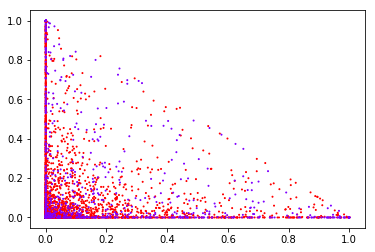

In [0]:
import matplotlib.pyplot as plt
y = profile_df.c_gender[df.index] == 'M'
X = df.values.astype('float')
# 標出 sample 點
plt.scatter(df['amt', 5311][:5000], df['amt', 5411][:5000],  c=y[:5000], cmap=plt.cm.rainbow, zorder=10, s=1);


In [0]:
X.shape

(236689, 472)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
X_train.shape

(165682, 472)

In [0]:
X_test.shape

(71007, 472)

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(np.array(X_train), y_train )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7013073236682319
0.6986775951666737


In [0]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
scores = cross_val_score(clf, X, y, cv=5)
scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([0.69945921, 0.696713  , 0.69760024, 0.70524737, 0.6975516 ])

In [0]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.70 (+/- 0.01)


In [0]:
# customization
clf = LogisticRegression()
scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro', n_jobs=1)
print(scores)
print("F1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.61821359 0.63078251 0.6227792  0.62380379 0.62721977 0.61527191
 0.62682801 0.63876992 0.61538633 0.61672711]
F1: 0.62 (+/- 0.01)


In [0]:
#pipeline
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

clf = make_pipeline(preprocessing.StandardScaler(), LogisticRegression())
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro', n_jobs=1)
print(scores)
print("F1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.62588504 0.62533133 0.62369034 0.63467326 0.61674819]
F1: 0.63 (+/- 0.01)
